In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from sklearn import svm
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from ModelPipelines.ModelAnalysis import recursive_feature_elimination
from mlpath import mlquest as mlq
mlq.start_quest("SVM", table_dest="../../", log_defs=True)

### Read the data

In [2]:
x_data_d, y_data_d = mlq.l(read_data)(kind="Numerical")

### Initiate SVM

In [3]:
clf = mlq.l(svm.SVC)(kernel='linear', C=7)

### Train & Evaluate SVM

In [4]:
y_pred = mlq.l(cross_val_predict)(clf, x_data_d, y_data_d, cv=4)
accuracy = np.mean(y_pred == y_data_d)
mlq.log_metrics(accuracy=accuracy.item())
print(classification_report(y_data_d, y_pred))
mlq.end_quest()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       152
           1       0.96      0.90      0.93       160
           2       0.96      0.98      0.97       324
           3       0.99      0.99      0.99       544

    accuracy                           0.98      1180
   macro avg       0.97      0.97      0.97      1180
weighted avg       0.98      0.98      0.98      1180



### Feature Selection with Recursive Feature Elimination

Features to keep ['Height' 'Weight' 'Veg_Consump']


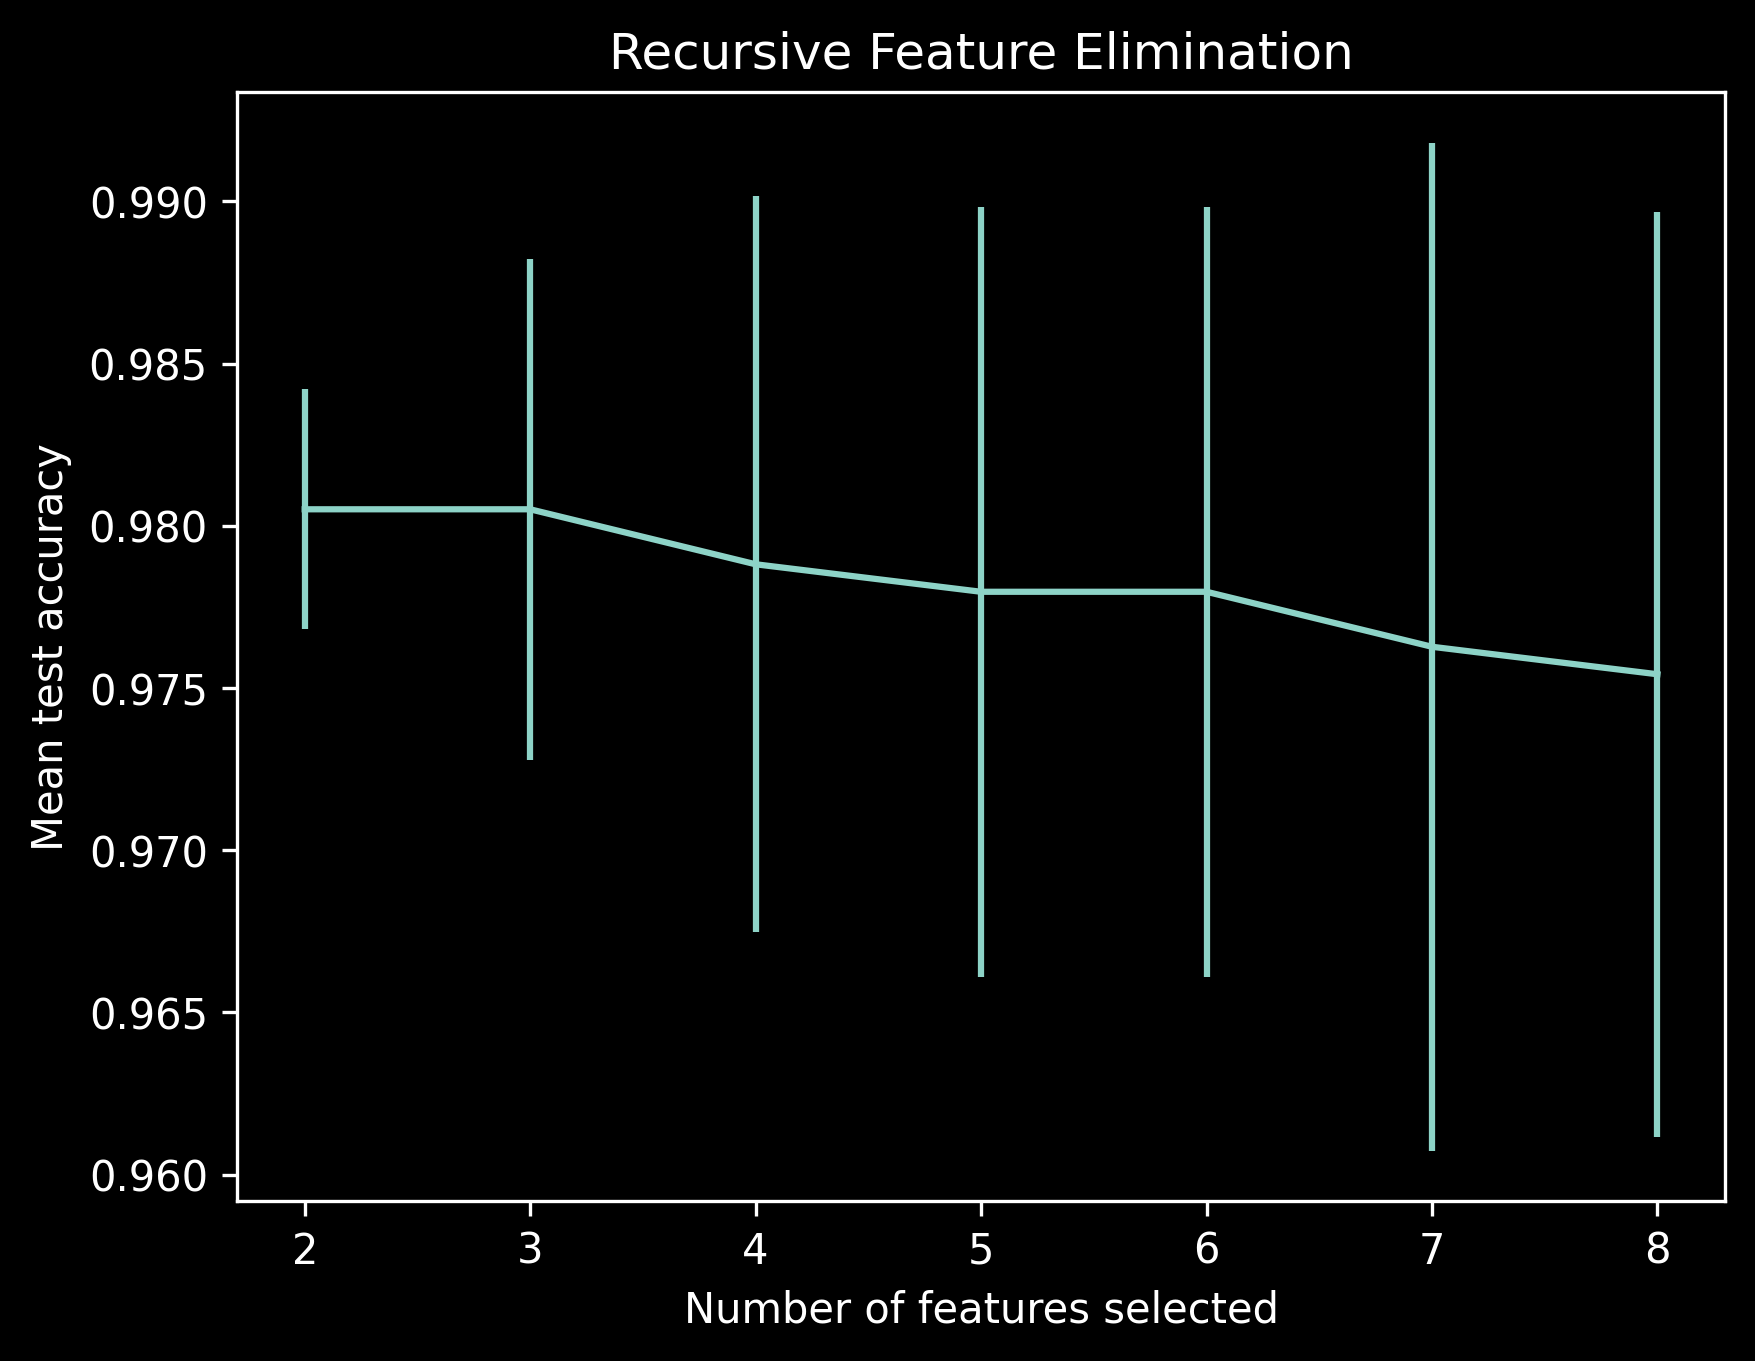

In [9]:
recursive_feature_elimination(clf, 2, 4, x_data_d, y_data_d)